# Demo for our project

In [ ]:
# Install dependencies
!pip install -r ./requirements.txt

In [21]:
# Import libraries
import pandas as pd
import numpy as np

import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

**<font color=#FF6900>Only models that are created using the loaded vectorisers can be used, otherwise the input size of the data and the actual input size of the model would be different.</font>**

In [5]:
# Load vectoriser and files
vectorizer_filename = "./vectorizers/pickle_vectorizer.pkl"
model_filename = "./pretrained_models/pickle_model_pretrained_1.pkl"

vectorizer = None
model = None

with open(vectorizer_filename, 'rb') as file:
    vectorizer = pickle.load(file)
    
with open(model_filename, 'rb') as file:
    model = pickle.load(file)
    
assert vectorizer is not None, "0.o Uh oh there's a problem loading the vectorizer..."
assert model is not None, "0.o Uh oh there's a problem loading the model..."

In [6]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer as PS

# Type in your own sentence in the list, and add the positive (1) or negative value (0) to the labels
# We included some obvious good and bad reviews, and some not indirect good and bad ones as well
sentences = ["I think that this movie deserved a 10/10 rating on its graphics",
            "This movie sucks, what a waste of money",
            "What is this movie, even my three-year-old can make a better movie than this.",
            "Oh my god, this movie reminds me of my late grandma, ah the memories",
            "What a waste of my hard earn money",
            "This movie definitely worth my $12 spent",
            "good",
            "bad",
            "this is not good",
            "this is not bad"]

labels = [1, 0, 0, 1, 0, 1, 1, 0, 0, 1]

# Perform some preprocessing like we did before in P1, and vectorisation
vectorized_sentences = [sen.lower().replace('[^\w\s]', '') for sen in sentences]
ps = PS()
stop_words = set(stopwords.words('english'))
vectorized_sentences = [' '.join([ps.stem(y) for y in x.split() if y not in stop_words]) for x in sentences]
vectorized_sentences = vectorizer.transform(sentences)

predictions = model.predict(vectorized_sentences)

for sen, pred in zip(sentences, predictions):
    print(f"{'Positive' if pred == 1 else 'Negative'} \t {sen}")

Positive 	 I think that this movie deserved a 10/10 rating on its graphics
Negative 	 This movie sucks, what a waste of money
Negative 	 What is this movie, even my three-year-old can make a better movie than this.
Positive 	 Oh my god, this movie reminds me of my late grandma, ah the memories
Negative 	 What a waste of my hard earn money
Positive 	 This movie definitely worth my $12 spent
Positive 	 good
Negative 	 bad
Positive 	 this is not good
Negative 	 this is not bad


#### Here are the confusion matrix, accuracy, false positive rate, and false negative rate of our demonstration.

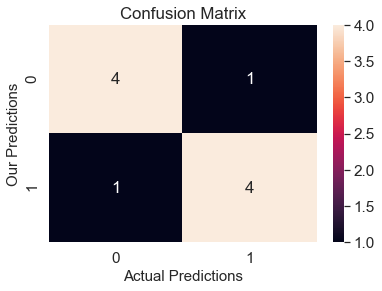

Accuracy		: 80.00%
False Positive Rate	: 0.200
False Negative Rate	: 0.200


In [24]:
# Plot confusion matrix, and calculate accuracy, fpr, and fnr
cm = confusion_matrix(labels, predictions)
tn, fp, fn, tp = cm.ravel()
acc = (tn + tp) / (tn + tp + fn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

ax = plt.axes()
sb.set(font_scale=1.4)
sb.heatmap(cm, annot=True, ax=ax)

ax.set_title('Confusion Matrix')
plt.xlabel('Actual Predictions', fontsize = 15) 
plt.ylabel('Our Predictions', fontsize = 15) 

plt.show()

print(f"Accuracy\t\t: {acc * 100:.2f}%")
print(f"False Positive Rate\t: {fpr:.3f}")
print(f"False Negative Rate\t: {fnr:.3f}")